In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv('hcirawdata.csv')

In [4]:
data.columns

Index(['Interface', 'Subject', 'Time 1', 'Time 2', 'Err 1 ', 'Err 2',
       'Recipes'],
      dtype='object')

In [5]:
data['timeavg'] = data.apply(lambda x: (x['Time 1'] + x['Time 2'] ) / 2, axis=1)
data['erravg'] = data.apply(lambda x: (x['Err 1 '] + x['Err 2'] ) / 2, axis=1)

In [6]:
# histogram showing timeavg of cases when Interface=="Structured" vs "Free-form" (differet colors with alpha)
structured = data[data['Interface'] == 'Structured']
freeform = data[data['Interface'] == 'Free-form']

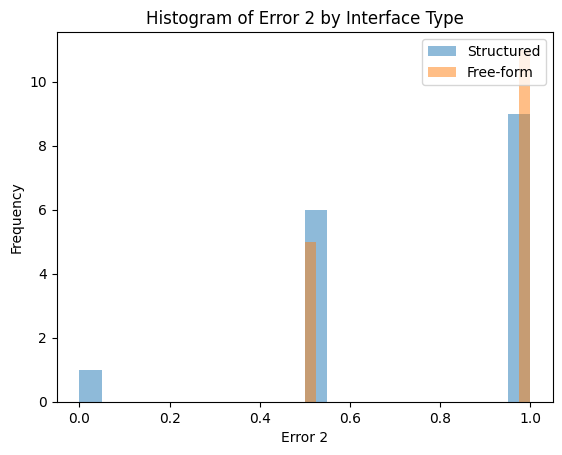

In [15]:
col = 'Err 2'
coltotitle = {
    'timeavg': 'Average Time',
    'erravg': 'Average Error',
    'Time 1': 'Time 1',
    'Time 2': 'Time 2',
    'Err 1 ': 'Error 1',
    'Err 2': 'Error 2'
}
plt.hist(structured[col], bins=20, alpha=0.5, label='Structured')
plt.hist(freeform[col], bins=20, alpha=0.5, label='Free-form')
plt.xlabel(coltotitle[col])
plt.ylabel('Frequency')
plt.title('Histogram of '+coltotitle[col]+' by Interface Type')
plt.legend(loc='upper right')
plt.show()

In [8]:
# given 2 columns of data, figure out if there's a statistically significant difference between them
def t_test(data1, data2):
    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f'T-statistic: {t_stat}, P-value: {p_value}')
    if p_value < 0.05:
        print("Reject the null hypothesis: there is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: there is no significant difference between the two groups.")
# t-test between structured and freeform
col = 'timeavg'
t_test(structured[col], freeform[col])

T-statistic: 6.542927744099262, P-value: 3.0901434314536665e-07
Reject the null hypothesis: there is a significant difference between the two groups.
